# Monetarist Theory of Price Levels with Adaptive Expectations

## Overview


This lecture is a sequel or prequel to {doc}`cagan_ree`.

We'll use linear algebra to do some experiments with  an alternative "monetarist" or  "fiscal" theory of  price levels.

Like the model in {doc}`cagan_ree`, the model asserts that when a government persistently spends more than it collects in taxes and prints money to finance the shortfall, it puts upward pressure on the price level and generates persistent inflation.

Instead of the "perfect foresight" or "rational expectations" version of the model in {doc}`cagan_ree`, our model in the present lecture is an "adaptive expectations"  version of a model that  {cite}`Cagan` used to study the monetary dynamics of hyperinflations.  

It combines these components:

* a demand function for real money balances that asserts that the logarithm of the quantity of real balances demanded depends inversely on the public's expected rate of inflation

* an **adaptive expectations** model that describes how the public's anticipated rate of inflation responds to past values of actual inflation

* an equilibrium condition that equates the demand for money to the supply

* an exogenous sequence of rates of growth of the money supply

Our model stays quite close to Cagan's original specification.  

As in {doc}`pv` and {doc}`cons_smooth`, the only linear algebra operations that we'll be  using are matrix multiplication and matrix inversion.

To facilitate using  linear matrix algebra as our principal mathematical tool, we'll use a finite horizon version of
the model.

## Structure of the model

Let 

* $ m_t $ be the log of the supply of  nominal money balances;
* $\mu_t = m_{t+1} - m_t $ be the net rate of growth of  nominal balances;
* $p_t $ be the log of the price level;
* $\pi_t = p_{t+1} - p_t $ be the net rate of inflation  between $t$ and $ t+1$;
* $\pi_t^*$  be the public's expected rate of inflation between  $t$ and $t+1$;
* $T$ the horizon -- i.e., the last period for which the model will determine $p_t$
* $\pi_0^*$ public's initial expected rate of inflation between time $0$ and time $1$.
  
  
The demand for real balances $\exp\left(m_t^d-p_t\right)$ is governed by the following  version of the Cagan demand function
  
$$  
m_t^d - p_t = -\alpha \pi_t^* \: , \: \alpha > 0 ; \quad t = 0, 1, \ldots, T .
$$ (eq:caganmd_ad)


This equation  asserts that the demand for real balances
is inversely related to the public's expected rate of inflation with sensitivity $\alpha$.

Equating the logarithm $m_t^d$ of the demand for money  to the logarithm  $m_t$ of the supply of money in equation {eq}`eq:caganmd_ad` and solving for the logarithm $p_t$
of the price level gives

$$
p_t = m_t + \alpha \pi_t^*
$$ (eq:eqfiscth1)

Taking the difference between equation {eq}`eq:eqfiscth1` at time $t+1$ and at time 
$t$ gives

$$
\pi_t = \mu_t + \alpha \pi_{t+1}^* - \alpha \pi_t^*
$$ (eq:eqpipi)

We assume that the expected rate of inflation $\pi_t^*$ is governed
by the following adaptive expectations scheme proposed by {cite}`Friedman1956` and {cite}`Cagan`, where $\lambda\in [0,1]$ denotes the weight on expected inflation.

$$
\pi_{t+1}^* = \lambda \pi_t^* + (1 -\lambda) \pi_t 
$$ (eq:adaptexpn)

As exogenous inputs into the model, we take initial conditions $m_0, \pi_0^*$
and a money growth sequence $\mu = \{\mu_t\}_{t=0}^T$.  

As endogenous outputs of our model we want to find sequences $\pi = \{\pi_t\}_{t=0}^T, p = \{p_t\}_{t=0}^T$ as functions of the exogenous inputs.

We'll do some mental experiments by studying how the model outputs vary as we vary
the model inputs.

## Representing key equations with linear algebra

We begin by writing the equation {eq}`eq:adaptexpn`  adaptive expectations model for $\pi_t^*$ for $t=0, \ldots, T$ as

$$
\begin{bmatrix} 1 & 0 & 0 & \cdots & 0 & 0 \cr
-\lambda & 1 & 0 & \cdots & 0 & 0 \cr
0 & - \lambda  & 1  & \cdots & 0 & 0 \cr
\vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
0 & 0 & 0 & \cdots & -\lambda & 1
\end{bmatrix}
\begin{bmatrix} \pi_0^* \cr
  \pi_1^* \cr
  \pi_2^* \cr
  \vdots \cr
  \pi_{T+1}^* 
  \end{bmatrix} =
  (1-\lambda) \begin{bmatrix} 
  0 & 0 & 0 & \cdots & 0  \cr
  1 & 0 & 0 & \cdots & 0   \cr
   0 & 1 & 0 & \cdots & 0  \cr
    \vdots &\vdots & \vdots & \cdots & \vdots  \cr
     0 & 0 & 0 & \cdots & 1  \end{bmatrix}
     \begin{bmatrix}\pi_0 \cr \pi_1 \cr \pi_2 \cr \vdots \cr \pi_T
  \end{bmatrix} +
  \begin{bmatrix} \pi_0^* \cr 0 \cr 0 \cr \vdots \cr 0 \end{bmatrix}
$$

Write this equation as

$$
 A \pi^* = (1-\lambda) B \pi + \pi_0^*
$$ (eq:eq1)

where the $(T+2) \times (T+2) $matrix $A$, the $(T+2)\times (T+1)$ matrix $B$, and the vectors $\pi^* , \pi_0, \pi_0^*$
are defined implicitly by aligning these two equations.

Next we write the key equation {eq}`eq:eqpipi` in matrix notation as

$$ 
\begin{bmatrix}
\pi_0 \cr \pi_1 \cr \pi_1 \cr \vdots \cr \pi_T \end{bmatrix}
= \begin{bmatrix}
\mu_0 \cr \mu_1 \cr \mu_2 \cr  \vdots \cr \mu_T \end{bmatrix}
+ \begin{bmatrix} - \alpha &  \alpha & 0 & \cdots & 0 & 0 \cr
0 & -\alpha & \alpha & \cdots & 0 & 0 \cr
0 & 0 & -\alpha & \cdots & 0 & 0 \cr
\vdots & \vdots & \vdots & \cdots & \alpha & 0 \cr
0 & 0 & 0 & \cdots & -\alpha  & \alpha 
\end{bmatrix}
\begin{bmatrix} \pi_0^* \cr
  \pi_1^* \cr
  \pi_2^* \cr
  \vdots \cr
  \pi_{T+1}^* 
  \end{bmatrix}
$$

Represent the previous equation system in terms of vectors and matrices as

$$
\pi = \mu + C \pi^*
$$ (eq:eq2)

where the $(T+1) \times (T+2)$ matrix $C$ is defined implicitly to align this equation with the preceding
equation system.

## Harvesting insights from our matrix formulation

We now have all of the ingredients we need to solve for $\pi$ as
a function of $\mu, \pi_0, \pi_0^*$.  

Combine equations {eq}`eq:eq1`and {eq}`eq:eq2`  to get

$$
\begin{aligned}
A \pi^* & = (1-\lambda) B \pi + \pi_0^* \cr
 & = (1-\lambda) B \left[ \mu + C \pi^* \right] + \pi_0^*
\end{aligned}
$$

which implies that

$$
\left[ A - (1-\lambda) B C \right] \pi^* = (1-\lambda) B \mu+ \pi_0^*
$$

Multiplying both sides of the above equation by the inverse of the matrix on the left side gives

$$
\pi^* = \left[ A - (1-\lambda) B C \right]^{-1} \left[ (1-\lambda) B \mu+ \pi_0^* \right]
$$ (eq:eq4)

Having solved equation {eq}`eq:eq4` for $\pi^*$, we can use  equation {eq}`eq:eq2`  to solve for $\pi$:

$$
\pi = \mu + C \pi^*
$$


We have thus solved for two of the key endogenous time series determined by our model, namely, the sequence $\pi^*$
of expected inflation rates and the sequence $\pi$ of actual inflation rates.  

Knowing these, we can then quickly calculate the associated sequence $p$  of the logarithm of the  price level
from equation {eq}`eq:eqfiscth1`. 

Let's fill in the details for this step.

Since we now know $\mu$  it is easy to compute $m$.

Thus, notice that we can represent the equations 

$$ 
m_{t+1} = m_t + \mu_t , \quad t = 0, 1, \ldots, T
$$

as the matrix equation

$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 \cr
-1 & 1 & 0 & \cdots & 0 & 0 \cr
0  & -1 & 1 & \cdots & 0 & 0 \cr
\vdots  & \vdots & \vdots & \vdots & 0 & 0 \cr
0  & 0 & 0 & \cdots & 1 & 0 \cr
0  & 0 & 0 & \cdots & -1 & 1 
\end{bmatrix}
\begin{bmatrix}  
m_1 \cr m_2 \cr m_3 \cr \vdots \cr m_T \cr m_{T+1}
\end{bmatrix}
= \begin{bmatrix}  
\mu_0 \cr \mu_1 \cr \mu_2 \cr \vdots \cr \mu_{T-1} \cr \mu_T
\end{bmatrix}
+ \begin{bmatrix}  
m_0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr 0
\end{bmatrix}
$$ (eq:eq101_ad)

Multiplying both sides of equation {eq}`eq:eq101_ad`  with the inverse of the matrix on the left will give 

$$
m_t = m_0 + \sum_{s=0}^{t-1} \mu_s, \quad t =1, \ldots, T+1
$$ (eq:mcum_ad)

Equation {eq}`eq:mcum_ad` shows that the log of the money supply at $t$ equals the log $m_0$ of the initial money supply 
plus accumulation of rates of money growth between times $0$ and $t$.

We can then compute $p_t$ for each $t$ from equation {eq}`eq:eqfiscth1`.

We can write a compact formula for $p $ as

$$ 
p = m + \alpha \hat \pi^*
$$

where 

$$
\hat \pi^* = \begin{bmatrix} \pi_0^* \cr
  \pi_1^* \cr
  \pi_2^* \cr
  \vdots \cr
  \pi_{T}^* 
  \end{bmatrix},
 $$

which is just $\pi^*$ with the last element dropped.
 
## Forecast errors and model computation

Our computations will verify that 

$$
\hat \pi^* \neq  \pi,
$$

so that in general

$$ 
\pi_t^* \neq \pi_t, \quad t = 0, 1, \ldots , T
$$ (eq:notre)

This outcome is typical in models in which adaptive expectations hypothesis like equation {eq}`eq:adaptexpn` appear as a
component.  

In {doc}`cagan_ree`, we studied a version of the model that replaces hypothesis {eq}`eq:adaptexpn` with
a "perfect foresight" or "rational expectations" hypothesis.

But now, let's dive in and do some computations with the adaptive expectations version of the model.

As usual, we'll start by importing some Python modules.

In [1]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

In [2]:
Cagan_Adaptive = namedtuple("Cagan_Adaptive", 
                        ["α", "m0", "Eπ0", "T", "λ"])

def create_cagan_adaptive_model(α = 5, m0 = 1, Eπ0 = 0.5, T=80, λ = 0.9):
    return Cagan_Adaptive(α, m0, Eπ0, T, λ)

md = create_cagan_adaptive_model()

We solve the model and plot variables of interests using the following functions.

In [3]:
def solve_cagan_adaptive(model, μ_seq):
    " Solve the Cagan model in finite time. "
    α, m0, Eπ0, T, λ = model
    
    A = np.eye(T+2, T+2) - λ*np.eye(T+2, T+2, k=-1)
    B = np.eye(T+2, T+1, k=-1)
    C = -α*np.eye(T+1, T+2) + α*np.eye(T+1, T+2, k=1)
    Eπ0_seq = np.append(Eπ0, np.zeros(T+1))

    # Eπ_seq is of length T+2
    Eπ_seq = np.linalg.solve(A - (1-λ)*B @ C, (1-λ) * B @ μ_seq + Eπ0_seq)

    # π_seq is of length T+1
    π_seq = μ_seq + C @ Eπ_seq

    D = np.eye(T+1, T+1) - np.eye(T+1, T+1, k=-1) # D is the coefficient matrix in Equation (14.8)
    m0_seq = np.append(m0, np.zeros(T))

    # m_seq is of length T+2
    m_seq = np.linalg.solve(D, μ_seq + m0_seq)
    m_seq = np.append(m0, m_seq)

    # p_seq is of length T+2
    p_seq = m_seq + α * Eπ_seq

    return π_seq, Eπ_seq, m_seq, p_seq

In [4]:
def solve_and_plot(model, μ_seq):
    
    π_seq, Eπ_seq, m_seq, p_seq = solve_cagan_adaptive(model, μ_seq)
    
    T_seq = range(model.T+2)
    
    fig, ax = plt.subplots(5, 1, figsize=[5, 12], dpi=200)
    ax[0].plot(T_seq[:-1], μ_seq)
    ax[1].plot(T_seq[:-1], π_seq, label=r'$\pi_t$')
    ax[1].plot(T_seq, Eπ_seq, label=r'$\pi^{*}_{t}$')
    ax[2].plot(T_seq, m_seq - p_seq)
    ax[3].plot(T_seq, m_seq)
    ax[4].plot(T_seq, p_seq)
    
    y_labs = [r'$\mu$', r'$\pi$', r'$m - p$', r'$m$', r'$p$']
    subplot_title = [r'Money supply growth', r'Inflation', r'Real balances', r'Money supply', r'Price level']

    for i in range(5):
        ax[i].set_xlabel(r'$t$')
        ax[i].set_ylabel(y_labs[i])
        ax[i].set_title(subplot_title[i])

    ax[1].legend()
    plt.tight_layout()
    plt.show()
    
    return π_seq, Eπ_seq, m_seq, p_seq

## Technical condition for stability

In constructing our examples, we shall assume that $(\lambda, \alpha)$ satisfy

$$
\Bigl| \frac{\lambda-\alpha(1-\lambda)}{1-\alpha(1-\lambda)} \Bigr| < 1
$$ (eq:suffcond)

The  source of this condition is the following string of deductions:

$$
\begin{aligned}
\pi_{t}&=\mu_{t}+\alpha\pi_{t+1}^{*}-\alpha\pi_{t}^{*}\\\pi_{t+1}^{*}&=\lambda\pi_{t}^{*}+(1-\lambda)\pi_{t}\\\pi_{t}&=\frac{\mu_{t}}{1-\alpha(1-\lambda)}-\frac{\alpha(1-\lambda)}{1-\alpha(1-\lambda)}\pi_{t}^{*}\\\implies\pi_{t}^{*}&=\frac{1}{\alpha(1-\lambda)}\mu_{t}-\frac{1-\alpha(1-\lambda)}{\alpha(1-\lambda)}\pi_{t}\\\pi_{t+1}&=\frac{\mu_{t+1}}{1-\alpha(1-\lambda)}-\frac{\alpha(1-\lambda)}{1-\alpha(1-\lambda)}\left(\lambda\pi_{t}^{*}+(1-\lambda)\pi_{t}\right)\\&=\frac{\mu_{t+1}}{1-\alpha(1-\lambda)}-\frac{\lambda}{1-\alpha(1-\lambda)}\mu_{t}+\frac{\lambda-\alpha(1-\lambda)}{1-\alpha(1-\lambda)}\pi_{t}
\end{aligned}
$$

By assuring that the coefficient on $\pi_t$ is less than one in absolute value, condition {eq}`eq:suffcond` assures stability of the dynamics of $\{\pi_t\}$ described by the last line of our string of deductions. 

The reader is free to study outcomes in examples that violate condition {eq}`eq:suffcond`.

In [5]:
print(np.abs((md.λ - md.α*(1-md.λ))/(1 - md.α*(1-md.λ))))

0.8


## Experiments

Now we'll turn to some experiments.

### Experiment 1

We'll study a situation in which the rate of growth of the money supply is $\mu_0$
from $t=0$ to $t= T_1$ and then permanently falls to $\mu^*$ at $t=T_1$.

Thus, let $T_1 \in (0, T)$. 

So where $\mu_0 > \mu^*$, we assume that

$$
\mu_{t} = \begin{cases}
    \mu_0  , & t = 0, \ldots, T_1 -1 \\
     \mu^* , & t \geq T_1
     \end{cases}
$$

Notice that  we studied exactly this experiment  in a rational expectations version of the model in {doc}`cagan_ree`.

So by comparing outcomes across the two lectures, we can learn about consequences of assuming adaptive expectations, as we do here, instead of  rational expectations as we assumed in that other lecture.

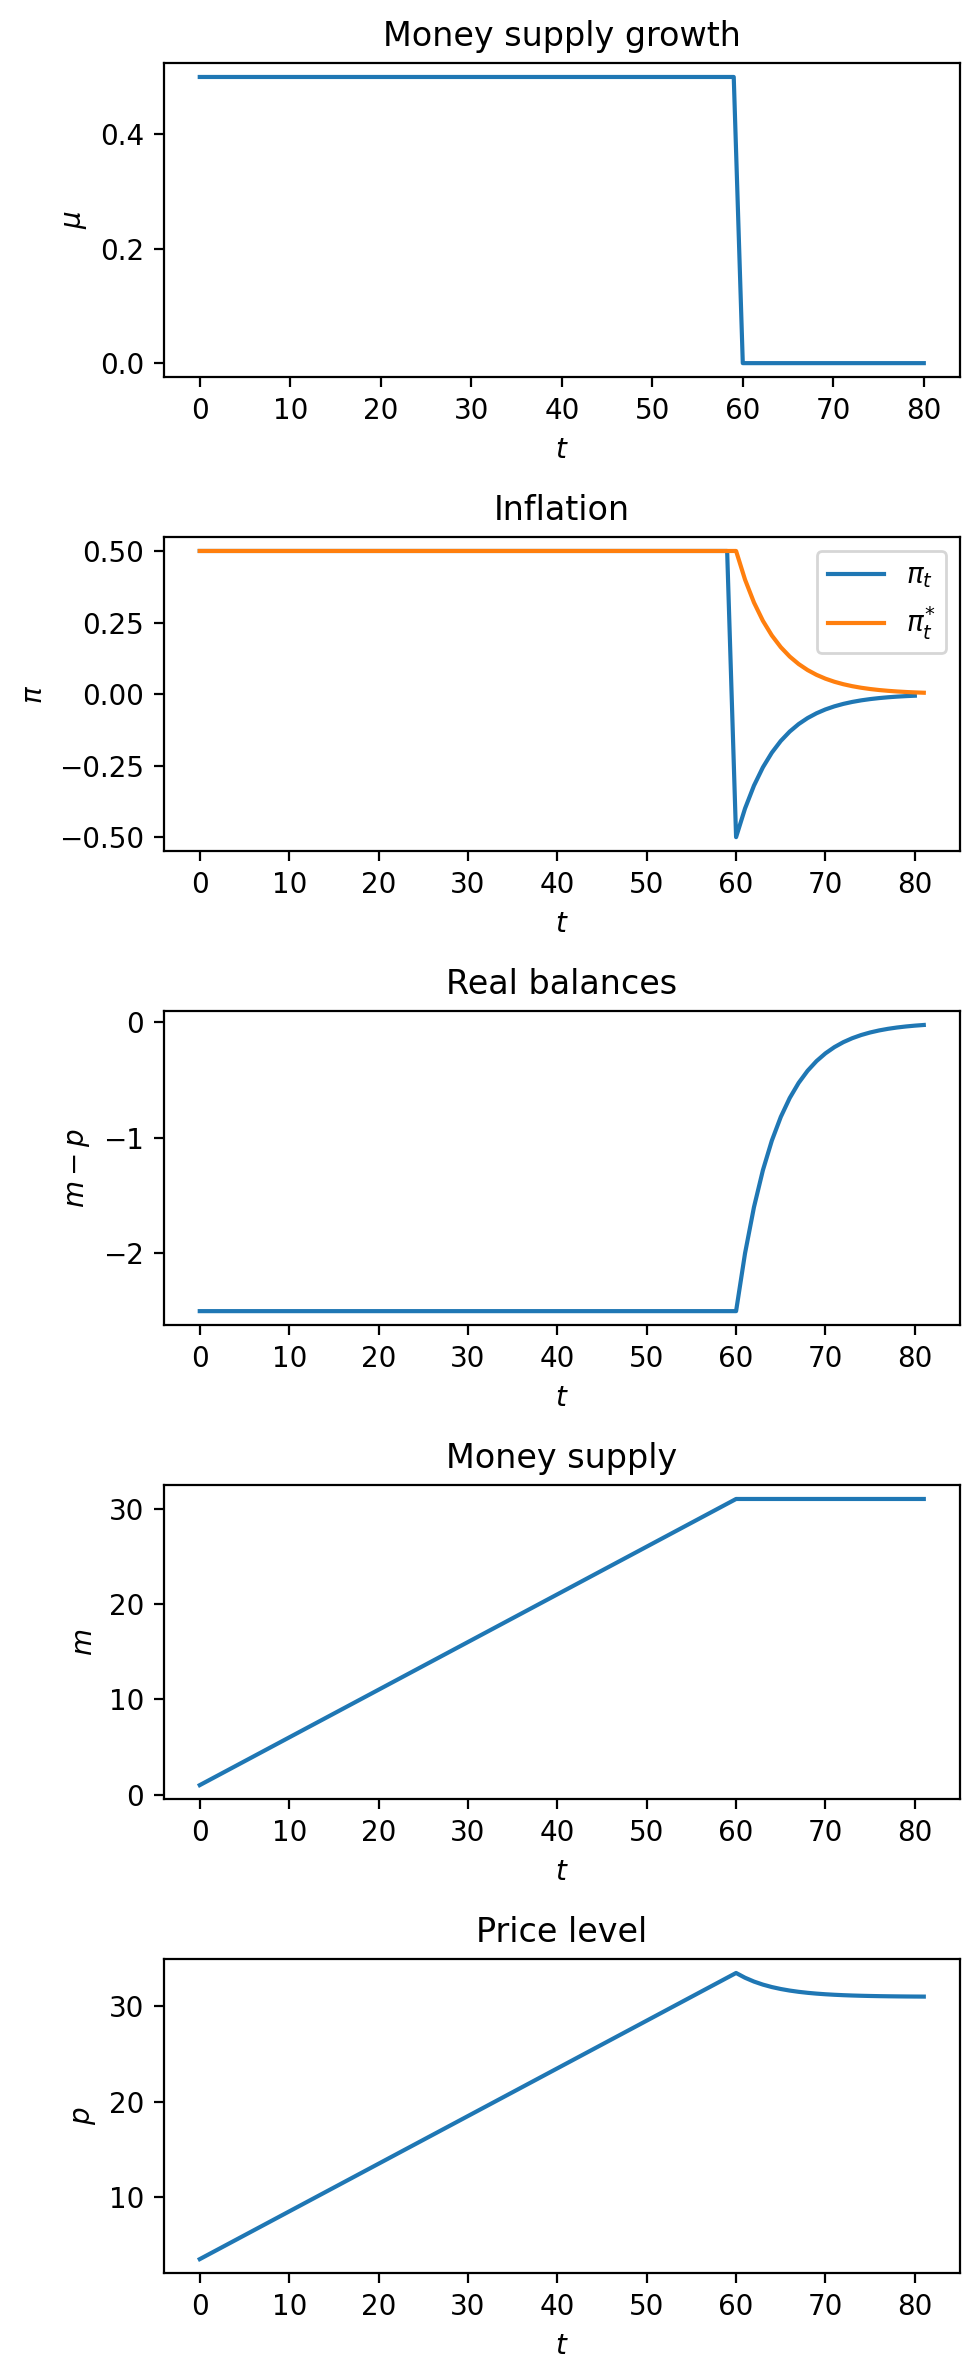

In [6]:
# Parameters for the experiment 1
T1 = 60
μ0 = 0.5
μ_star = 0

μ_seq_1 = np.append(μ0*np.ones(T1), μ_star*np.ones(md.T+1-T1))

# solve and plot
π_seq_1, Eπ_seq_1, m_seq_1, p_seq_1 = solve_and_plot(md, μ_seq_1)

We invite the reader to compare outcomes with those under rational expectations studied in {doc}`cagan_ree`.

Please note how the actual inflation rate $\pi_t$ "overshoots" its ultimate steady-state value at the time of the sudden reduction in the rate of growth of the money supply at time $T_1$.

We invite you to explain to  yourself the source of this overshooting and why it does not occur in  the rational expectations version of the model.

### Experiment 2

Now we'll do a different experiment, namely, a gradual stabilization in which the rate of growth of the money supply smoothly 
decline from a high value to a persistently low value.  

While price level inflation eventually falls, it falls more slowly than the driving  force that ultimately causes it to fall, namely, the falling rate of growth of the money supply.

The sluggish fall in inflation is explained by how anticipated  inflation $\pi_t^*$ persistently exceeds actual inflation $\pi_t$ during the transition from a high inflation to a low inflation situation.

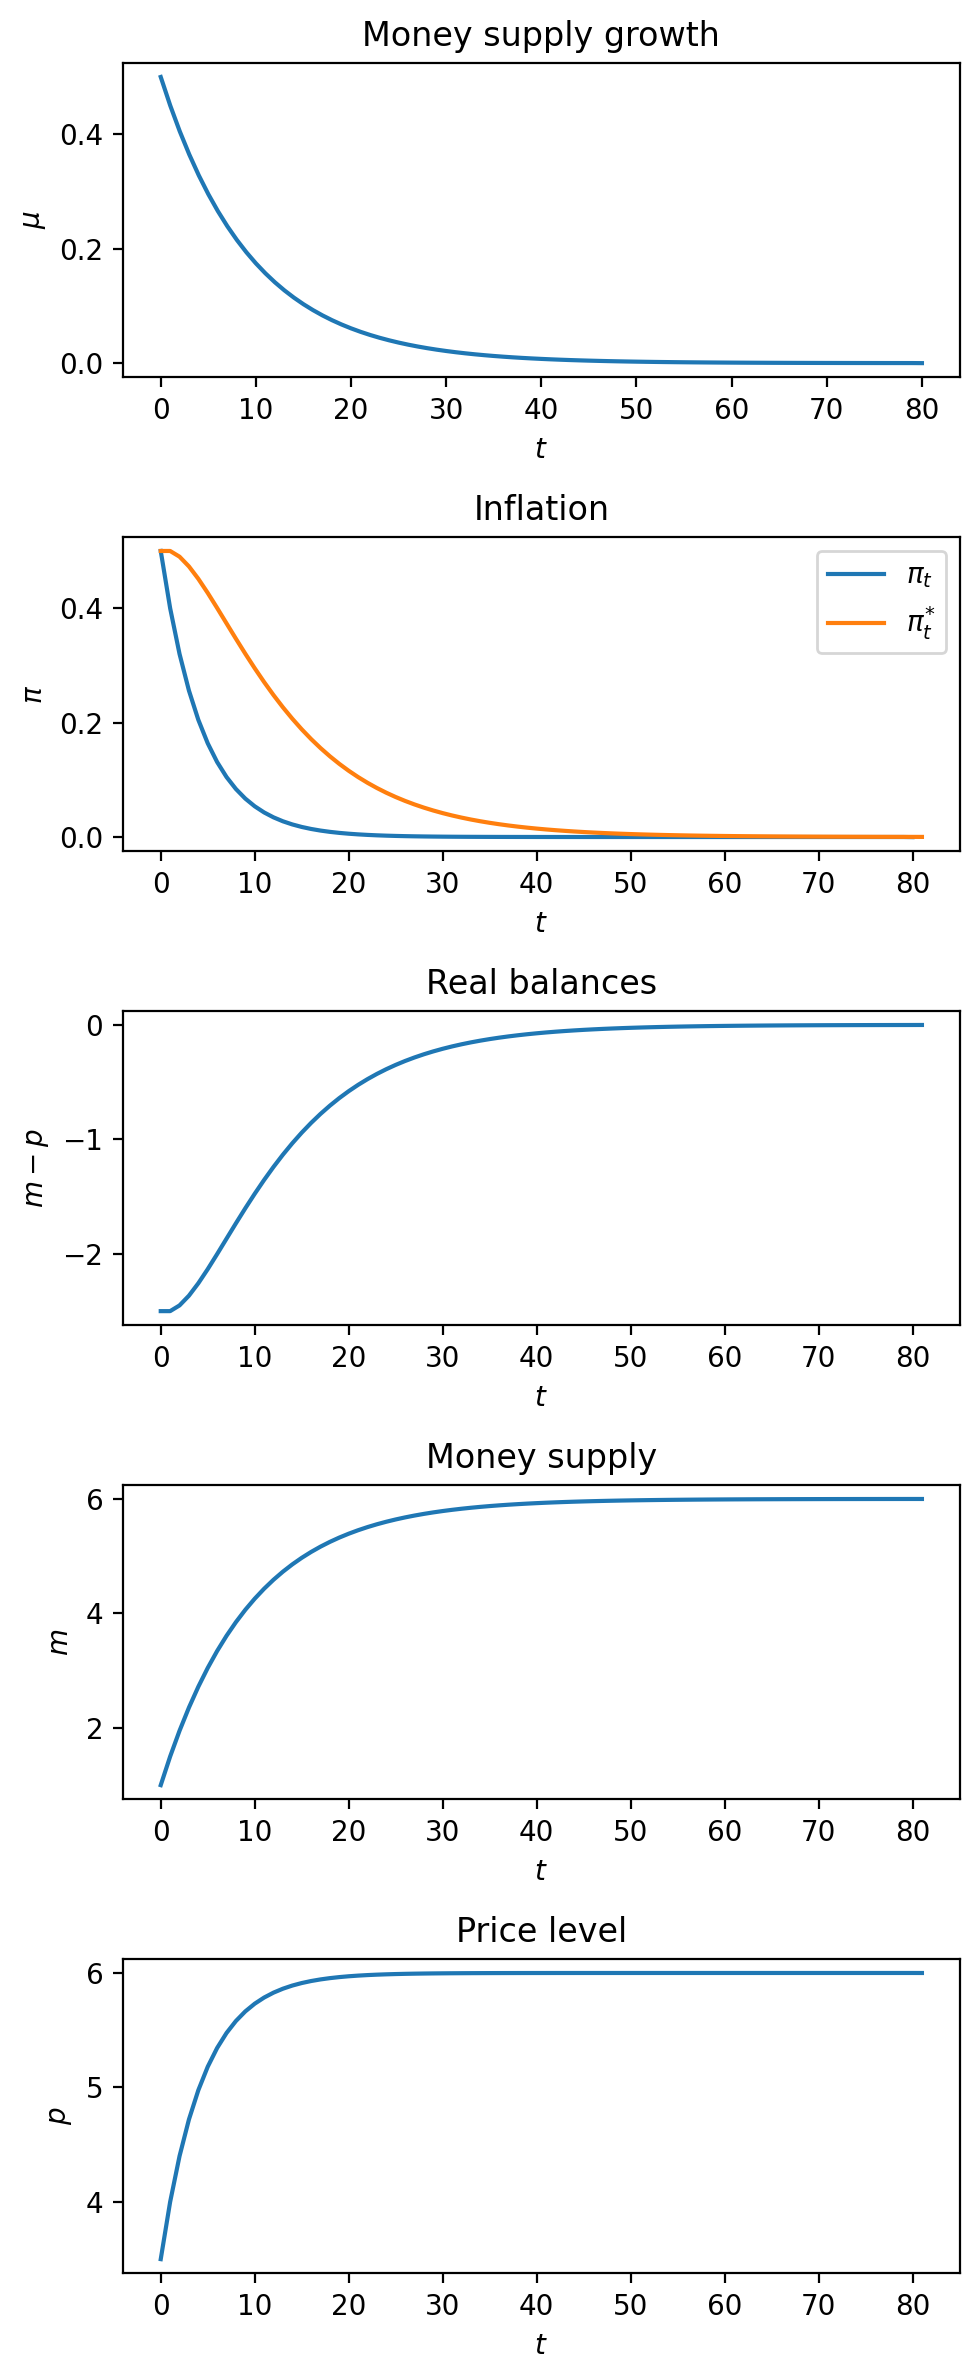

In [7]:
# parameters
ϕ = 0.9
μ_seq_2 = np.array([ϕ**t * μ0 + (1-ϕ**t)*μ_star for t in range(md.T)])
μ_seq_2 = np.append(μ_seq_2, μ_star)


# solve and plot
π_seq_2, Eπ_seq_2, m_seq_2, p_seq_2 = solve_and_plot(md, μ_seq_2)